<style>
/* Set font size for headers */
h1, h2, h3, h4, h5, h6 {
    font-size: 32px; /* Adjust as needed */
}

/* Set font size for paragraphs */
p, li, ul {
    font-size: 24px; /* Adjust as needed */
}
</style>


Introduction to the Julia programming language

![](images/julia-logo.svg)

## 14 Data Frames

In [1]:
using CSV, DataFrames
ENV["DATAFRAMES_ROWS"] = 6;

In [2]:
magic_data = CSV.read(joinpath("data", "magic04_data.txt"), DataFrame)

Row,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,String1
1,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g
2,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261,g
3,162.052,136.031,4.0612,0.0374,0.0187,116.741,-64.858,-45.216,76.96,256.788,g
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
19018,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.517,h
19019,120.513,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.317,h
19020,187.181,53.0014,3.2093,0.2876,0.1539,-167.312,-168.456,31.4755,52.731,272.317,h


In [20]:
names(magic_data)

11-element Vector{String}:
 "fLength"
 "fWidth"
 "fSize"
 "fConc"
 "fConc1"
 "fAsym"
 "fM3Long"
 "fM3Trans"
 "fAlpha"
 "fDist"
 "class"

## Accessing Data

The template for accessing data from a DataFrame is:

```julia
my_data[selected_rows, selected_columns]
```
    
There are a few different patterns for this, but the template is always the same.
    
Extracting data (without copying) works like this:

In [3]:
magic_data[!, [:fSize]]

Row,fSize
,Float64
1,2.6449
2,2.5185
3,4.0612
⋮,⋮
19018,3.4483
19019,3.9939
19020,3.2093


This is the recommended way to do this, although `magic_data.fSize` and `magic_data[!, "fSize"]` will also work

## Copying Data

If a `:` notation is used for the row selection, then a copy of the data is made:

In [8]:
# Select the given columns from rows 1 to 5
mini_magic_data = magic_data[1:5, [:fLength, :fWidth, :fSize]] 

Row,fLength,fWidth,fSize
,Float64,Float64,Float64
1,28.7967,16.0021,2.6449
2,31.6036,11.7235,2.5185
3,162.052,136.031,4.0612
4,23.8172,9.5728,2.3385
5,75.1362,30.9205,3.1611


One can use an appropriate row vector to set any row in the data frame:

In [9]:
mini_magic_data[3, 1:3] = [160., 136., 4.]
mini_magic_data

Row,fLength,fWidth,fSize
,Float64,Float64,Float64
1,28.7967,16.0021,2.6449
2,31.6036,11.7235,2.5185
3,160.0,136.0,4.0
4,23.8172,9.5728,2.3385
5,75.1362,30.9205,3.1611


## Selection from `bool`

A powerful way to select data is to select rows on a boolean vector constructed from the data frame itself, e.g., to select all rows that are signal events do the following.

(Below we explain why you need to use `.==` to broadcast the comparison.)

In [6]:
magic_data[magic_data.class .== "g", [:fLength, :fWidth, :fSize]]

Row,fLength,fWidth,fSize
,Float64,Float64,Float64
1,28.7967,16.0021,2.6449
2,31.6036,11.7235,2.5185
3,162.052,136.031,4.0612
⋮,⋮,⋮,⋮
12330,22.0913,10.8949,2.2945
12331,56.2216,18.7019,2.9297
12332,31.5125,19.2867,2.9578


## Broadcast Assignment

To broadcast operations across a data frame, we use Julia's `.=` operation

In [10]:
mini_magic_data[!, :fSize] .*= 1000
mini_magic_data

Row,fLength,fWidth,fSize
,Float64,Float64,Float64
1,28.7967,16.0021,2644.9
2,31.6036,11.7235,2518.5
3,160.0,136.0,4000.0
4,23.8172,9.5728,2338.5
5,75.1362,30.9205,3161.1


## Adding New Data

Adding new data to a data frame is just a matter of assigning to a new column (using the Julia *symbol* for the name is useful)

In [26]:
mini_magic_data[:, :name] = ["alice", "bob", "ciarn", "dinah", "elmer"]
mini_magic_data

Row,fLength,fWidth,fSize,name
,Float64,Float64,Float64,String
1,28.7967,16.0021,2644.9,alice
2,31.6036,11.7235,2518.5,bob
3,160.0,136.0,4000.0,ciarn
4,23.8172,9.5728,2338.5,dinah
5,75.1362,30.9205,3161.1,elmer


## Event selection

The first thing we might want to do is ensure that we can select events that match some particular criteria - for that we can use the `subset` function.

Usually one would not want to bother with a named function for these kind of trivial selections - use an anonymous function:

In [34]:
subset(mini_magic_data, [:fLength, :fWidth] => (l, w) -> (l .>= 30) .&& (w .> 10))

Row,fLength,fWidth,fSize,name,fArea
,Float64,Float64,Float64,String,Float64
1,31.6036,11.7235,2518.5,bob,370.505
2,160.0,136.0,4000.0,ciarn,21760.0
3,75.1362,30.9205,3161.1,elmer,2323.25


Can also use of course be done like so:

In [43]:
mini_magic_data[mini_magic_data.fLength .> 30 .&& mini_magic_data.fWidth .> 10, :]

Row,fLength,fWidth,fSize,name,fArea
,Float64,Float64,Float64,String,Float64
1,31.6036,11.7235,2518.5,bob,370.505
2,160.0,136.0,4000.0,ciarn,21760.0
3,75.1362,30.9205,3161.1,elmer,2323.25


## Derived Data

For some analysis, it's pretty useful to add derived values, which we know how to do:

In [29]:
transform!(mini_magic_data, [:fLength, :fWidth] => ByRow((l, w) -> l * w) => :fArea)

Row,fLength,fWidth,fSize,name,fArea
,Float64,Float64,Float64,String,Float64
1,28.7967,16.0021,2644.9,alice,460.808
2,31.6036,11.7235,2518.5,bob,370.505
3,160.0,136.0,4000.0,ciarn,21760.0
4,23.8172,9.5728,2338.5,dinah,227.997
5,75.1362,30.9205,3161.1,elmer,2323.25


## Map data to different values

In [11]:
magic_data.class = (l -> l == "g" ? 1 : 0).(magic_data.class)
magic_data

Row,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64
1,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,1
2,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261,1
3,162.052,136.031,4.0612,0.0374,0.0187,116.741,-64.858,-45.216,76.96,256.788,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
19018,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.517,0
19019,120.513,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.317,0
19020,187.181,53.0014,3.2093,0.2876,0.1539,-167.312,-168.456,31.4755,52.731,272.317,0


## Transform, Select, Combine, GroupBy, Filter

Just as a short summary of the data frame manipulation functions we met:

| **Function** | **Description** |
|---|---|
| `transform` | Apply a transformation operation to one or more columns, return all columns plus any new ones |
| `select` | Apply a transformation operation to one or more columns, only return columns that are selected, in the order requested |
| `combine` | Apply a transformation operation, then collapse the result for identical output rows |
| `groupby` | Split a data frame into pieces according to a certain criterion |
| `filter` | Apply a selection operation to a data frame - argument order follows the method convention |

The use of `groupby` and `combine` allows us to powerfully manipulate data in Julia using the well known [*Split, Combine, Apply* strategy](http://www.jstatsoft.org/v40/i01), originally introduced for S.

## Visulization

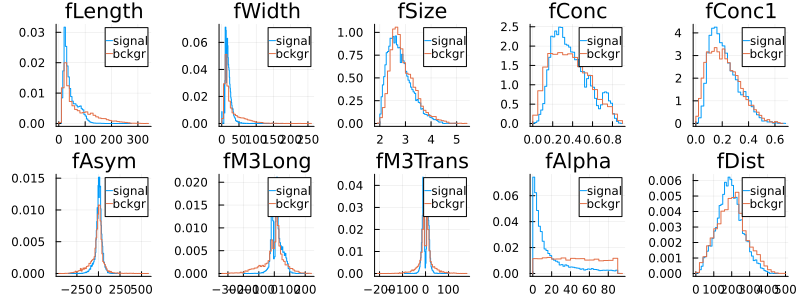

In [31]:
using Plots
layout = @layout [a b c d e; f g h i j]
p = plot(layout = layout, legend = :topright, size = (800, 300))

for (i, col) in enumerate(names(magic_data)[1:end-1])
    magic_data_signal = filter(:class => l -> l==1, magic_data)
    magic_data_backgr = filter(:class => l -> l==0, magic_data)
    stephist!(magic_data_signal[!, col], title=col, normalize=true, subplot=i, label="signal")
    stephist!(magic_data_backgr[!, col], normalize=true, subplot=i, label="bckgr")
end

p